In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None
plt.rcParams["figure.figsize"]=16,10
plt.rcParams.update({'font.size': 16})

In [2]:
import os
project_root = os.path.dirname(os.getcwd())
output_path = os.path.join(project_root, 'outputs')
input_path = os.path.join(project_root, 'data')

In [3]:
from psy_simple.plotters import CMap, Bounds
from psy_maps.plotters import Transform, MapPlot2D, LonLatBox, MapPlotter
from psyplot.plotter import Plotter
import cartopy.crs as ccrs
import psyplot.project as psy
import xarray as xr
import cfgrib
import icon_vis.modules as iconvis
import zarr
import glob
from PIL import Image

In [4]:
ds_final = xr.open_zarr("/scratch/sadamov/aldernet/baseline", consolidated=False)

In [5]:
ds_final

<xarray.Dataset>
Dimensions:     (time: 25, y: 786, x: 1170)
Coordinates:
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * time        (time) datetime64[ns] 2022-02-09 ... 2022-02-10T23:00:00
    valid_time  datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    ALNUtune    (time, y, x) float32 ...
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_edition:            2
    GRIB_subCentre:          255
    history:                 2022-05-17T15:31 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             Zurich

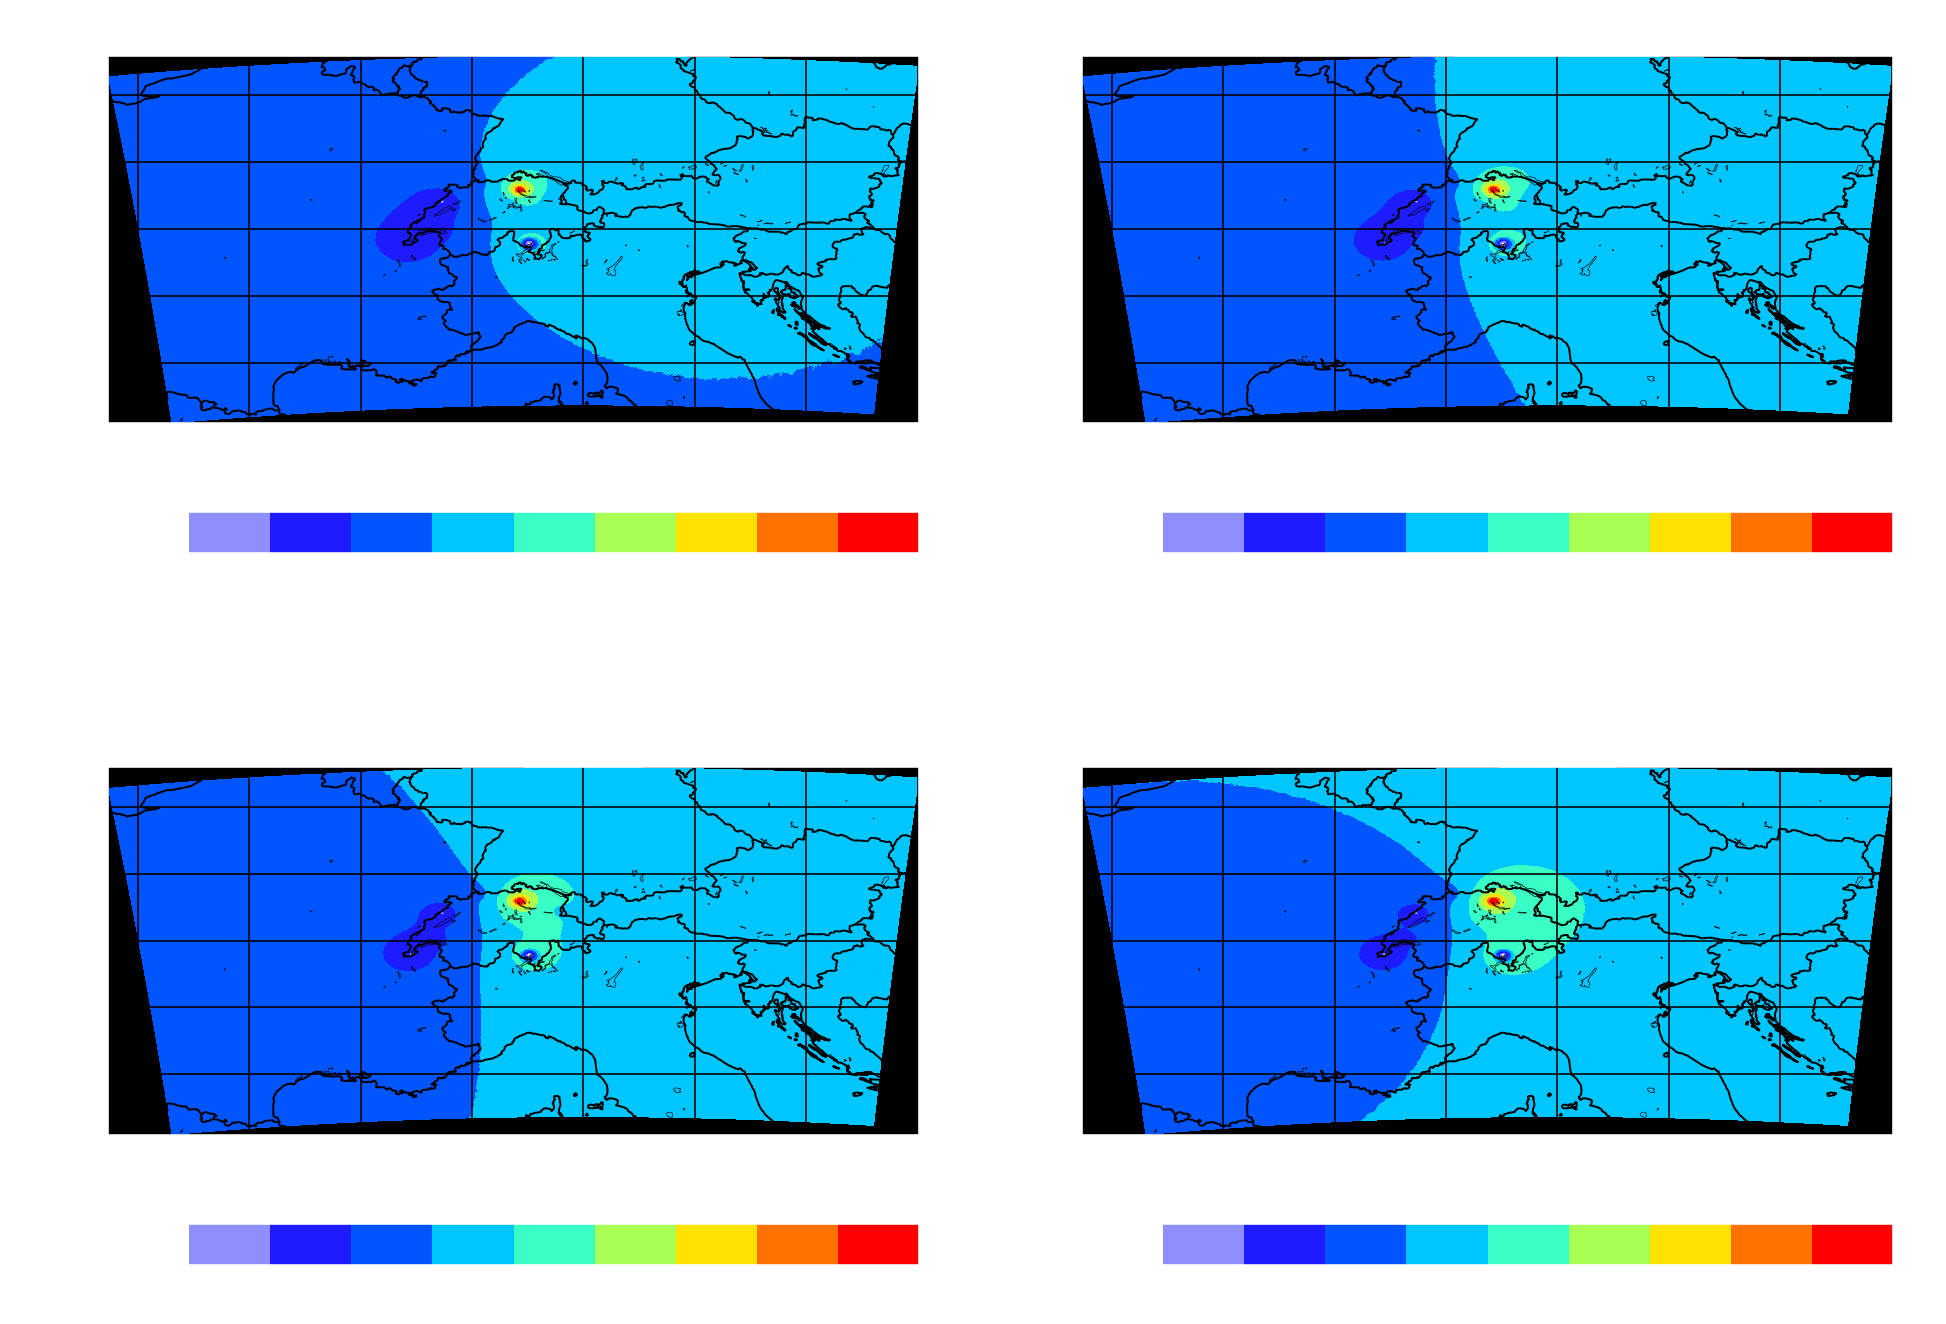

In [7]:
plot1 = ds_final.psy.plot.mapplot(
    name="ALNUtune",
    time=[1,2,3,4],
    sort=["time"],
    ax=(2,2),
    title="ALNUtune %c",
    map_extent=[5.5, 11.0, 45.5, 48.0])


In [ ]:
for time in range(1, 25):
    plot1 = ds_final.psy.plot.mapplot(
        name="ALNUtune",
        time=time,
        sort=["time"],
        title="ALNUtune %c",
        map_extent=[5.5, 11.0, 45.5, 48.0])

    plt.ioff()
    with plot1 as sp:
        sp.export(output_path + '/map_' + str(time).zfill(3) + '.png')
    plt.ion


In [ ]:
frames = [Image.open(image) for image in sorted(glob.glob(f"{output_path}/*.png"))]
frame_one = frames[0]
frame_one.save(output_path + "/my_awesome.gif", format="GIF", append_images=frames,
               save_all=True, duration=200, loop=0)
